In [1]:
import polymorph_s2df as sdf
from polymorph_s2df.devutils import *

from polymorph_num.expr import Expr, as_expr
from polymorph_num.vec import Vec2

import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt

from functools import partial


## Checking how the winding number works with a line segment

In [2]:
 s = sdf.LineSegment(
                (0, 0),
                (100, 0),
        )

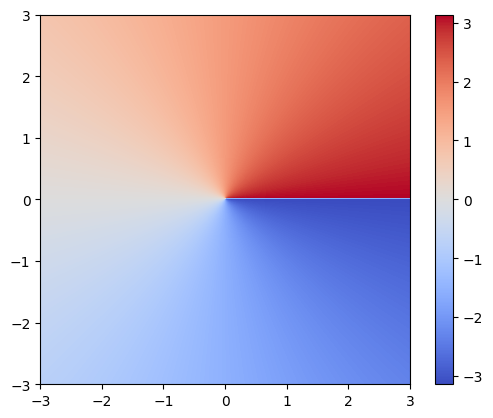

In [3]:
render_winding_number(s)

## Checking the polygon implementatiopn

In [4]:

def polygon(points):
    if len(points) < 3:
        return sdf.Circle(as_expr(0.0))
    segments = [
        sdf.LineSegment(
                points[i],
                points[(i + 1) % len(points)],
        )
        for i in range(len(points))
    ]
    return sdf.ClosedPath(tuple(segments))


In [5]:
p = polygon([(0, 0),  (0.5, 1), (1, 0), ])
p2 = polygon([(0.1, 0.1),  (-0.3, 0.2), (-1, -1), (0.2, -1)])


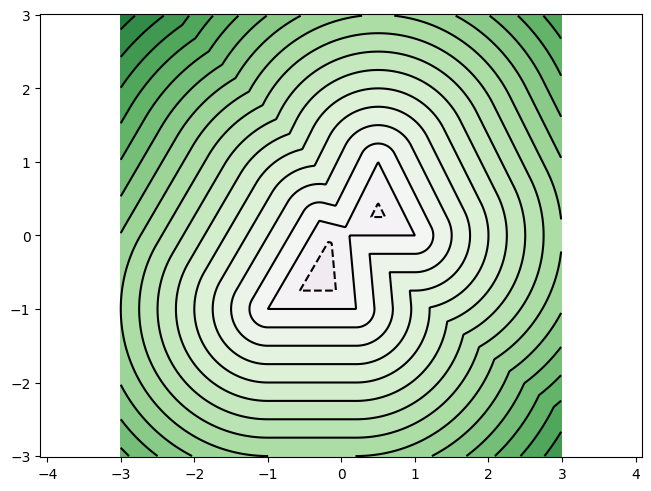

In [6]:
render_distance(p2.union(p))

With this method, we have a clean way to handle self intersections

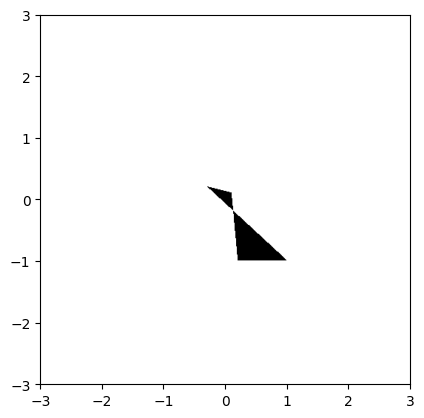

In [7]:
render(polygon([(0.1, 0.1),  (-0.3, 0.2), (1, -1), (0.2, -1)]))